In [1]:
%matplotlib inline
import numpy as np;
import scipy;
import scipy.misc;
import matplotlib
import matplotlib.pyplot as plt

# import demos
from code.l12_newton import *;

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L13: Matrix Decompositions

*Tuesday, October 1, 2018*

### Recall:  Eigenvalue Decomposition

Via the **Spectral Theorem**, we know that for any symmetric matrix $A \in \R^{n \times n}$, we can decompose $A$ as follows:
$$A = Q \Lambda Q^{-1}$$
where $Q$ is the square $n \times n$ matrix consisting of the eigenvectors of $A$, $Q$ is an orthongal matrix ($Q Q^\top = I$, so $Q^{-1} = Q^\top$), and $\Lambda$ is a the diagonal matrix whose entries on the diagonal consist of eigenvalues $\lambda_1, \ldots, \lambda_n$ of $A$.


In [5]:
import numpy as np
X = np.random.randn(10,5)
U, sigmas, V = np.linalg.svd(X)

In [9]:
sigmas

array([ 6.53666873,  3.68170861,  3.40337949,  2.3688337 ,  1.85248903])

### Singular Value Decomposition

Suppose $M$ is a $m \times n$ real matrix. Then there exists a factorization, called a *singular value decomposition* of $M$:

$$\mathbf{M} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top $$

where 
* $\mathbf U$ is a $m \times m$ orthogonal matrix -- that is, $U U^\top = U^\top U = I$
* $\boldsymbol{\Sigma}$ is a rectangular diagonal $m \times n$ matrix with non-negative real numbers on the diagonal, 
* $\mathbf V$ is an $n \times n$ orthogonal matrix -- $V V^\top = V^\top V = I$

The diagonal entries $\sigma_i$ of $\boldsymbol{\Sigma}$ are known as the *singular values* of $M$, listed in descending order.

### SVD:  Terminology

$$\mathbf{M} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^\top $$

* We say that the columns of $U = [u_{(1)} ... u_{(n)}]$ are the *left singular vectors* of $M$
* We say that $V = [v_{(1)} ... v_{(n)}]$ are the *right singular vectors* of $M$
* Another way to write the decomposition is the following. Let $k = \min(m,n)$, then
$$ M = \sum_{i=1}^k \sigma_i u_{(i)} v_{(i)}^\top$$

### Problem

SVD: Let $M$ be a rank $k$ matrix. Then we can write $M = U \Sigma V^\top $, where $U$ is $m \times m$ and $U U^\top = I$, $V$ is $n \times n$ and $V V^\top = I$, and $\Sigma$ is $m \times n$ and contains only the singular values $\sigma_1, \ldots \sigma_k$ on the diagonal (all else 0s).

**Show**: We define the Frobenius norm of a matrix as $\|M\|_F$ is $\sqrt{\sum_{i,j} M_{ij}^2}$. Show that
$$ \|M\|_F^2 = \sum_{i=1}^k \sigma_i^2$$. *(Hint: it is convenient to use the fact that $\|M\|_F^2 = \text{trace}(M^\top  M)$)*


### Solution

Note that $M^\top  M$ is $ V \Sigma^\top U^\top U \Sigma V^\top = V (\Sigma^\top \Sigma) V^\top$. It is true that for any orthogonal matrix $U$, $\text{trace}(U A U^\top) = \text{trace}(A)$. Hence $\text{trace}(V (\Sigma^\top \Sigma) V^\top) = \text{trace}(\Sigma^\top \Sigma)$, and of course the trace of $\Sigma^\top \Sigma$ is the sum of squares of the singular values!


## Problem

SVD: Let $M$ be a rank $k$ matrix. Then we can write $M = U \Sigma V^\top $, where $U$ is $m \times m$ and $U U^\top = I$, $V$ is $n \times n$ and $V V^\top = I$, and $\Sigma$ is $m \times n$ and contains only the singular values $\sigma_1, \ldots \sigma_k$ on the diagonal (all else 0s).

Let $M = U \Sigma V^\top$ be the SVD of the matrix $M$. Show that $\lambda$ is an eigenvalue of $M^\top M$ if and only if $\sqrt{\lambda}$ is one of the singular values of $M$.

### Solution

If $M = U \Sigma V^\top$ then $M^\top M = V \Sigma^\top U^\top U \Sigma V^\top = V (\Sigma^\top \Sigma) V^\top$. Now let's consider what happens if $M x = \lambda x$. We would have $V (\Sigma^\top \Sigma) V^\top x = \lambda x$ and multiplying by $V^\top$ on both sides, and writing $V^\top x = y$, we have $(\Sigma^\top \Sigma) y = \lambda y$. But $(\Sigma^\top \Sigma)$ is a diagonal matrix whose diagonal entries are the squares of the singular values of $M$!

### SVD:  Low-Rank Approximation

<div style="padding:20px; margin:20px; border: 1px solid black">
<b>Theorem.</b>Let $A \in \R^{m \times n}$ have rank $r$.  For any $0 \leq k \leq r$, define 
    $$
    A_k = \sum_{j=1}^k \sigma_j u_j v_j^*
    $$
If $k = \min\{m,n\}$, define $\sigma_{k+1} = 0$.  Then,
    $$
    \norm{A - A_k}_2 = \min_{\mathrm{rank}(B)=k} \norm{A-B}_2 = \sigma_{k+1} 
    $$
</div>

### Problem

(a) If you have a unit vector $x$ (in standard basis), and you have an orthogonal matrix $U = [u_1 u_2 \ldots u_n]$, how can write $x$ in the basis defined by $U$?

(b) Show that the $x$ that achieves $\max_{\| x \| = 1} \| A x \|$ is the largest right singular vector of $A$, and the value of $\max_{\| x \| = 1} \| A x \|$ is the largest singular value of $A$!

### Application:  Image Compression

The singular value decomposition can be used to *compress* a matrix $A$ by approximating it with a low-rank matrix $A_k$, as in the theorem.

* Use Python to convert a (grayscale) image to a matrix
    * To get started quickly, see `scipy.misc.ascent()` or `scipy.misc.face()`
    * You can view your matrix as an image using `matplotlib.pyplot.imshow`
* Use `numpy.linalg.svd` to compute the SVD.  Plot the (sorted) singular values.  What is the approximate rank of your image matrix?
* Using the SVD you computed, write a function to compute the best rank-$k$ approximation to your image.  Plot the approximation for several values of $k$.

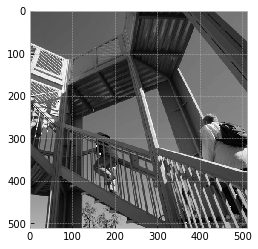

In [10]:
image = scipy.misc.ascent();
plt.gray();
plt.imshow(image);

In [13]:
image.shape

(512, 512)

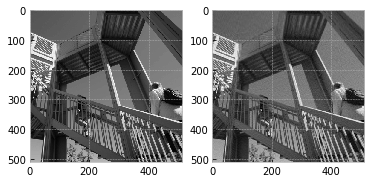

In [28]:
U,s,V = np.linalg.svd(image);
sprime = s.copy()
sprime[100:] = 0.
fig,ax = plt.subplots(1,2)
ax[0].imshow(U @ np.diag(s) @ V);
ax[1].imshow(U @ np.diag(sprime) @ V);

### SVD:  Geometric Interpretation

<div style="padding:20px; margin:20px; border: 1px solid black">
The image of the unit sphere any $m \times n$ matrix is a hyperellipse.
</div>

### Problem (Trefethen & Bau #4.4)

For this problem, call $A,B \in \R^{m \times m}$ *orthogonally similar* if $A = Q B Q^T$ for some orthogonal matrix $Q \in \R^{m \times m}$.

<div style="padding:20px; margin:20px; border: 1px solid black">
<b>True/False?</b> Two matrices are orthogonally similar if and only if they have the same singular values.
</div>

### Problem (Trefethen & Bau #5.4)

<div style="padding:20px; margin:20px; border: 1px solid black">
<b>Problem:</b> Suppose $A \in \R^{m \times m}$ has SVD $A = U \Sigma V^T$.  Find an eigenvalue decomposition of the $(2m \times 2m)$ symmetric matrix
    $$
    \begin{bmatrix} 0 & A^T \\ A & 0 \end{bmatrix}
    $$
</div>

### Recall:  Rayleigh Quotient

Let $A \in \R^{m times m}$ be symmetric.  For HW1, you showed that the stationary points of the **Rayleigh quotient** are the eigenvectors of $A$.
$$
R(x) = \frac{x^T A x}{\norm{x}_2^2}
$$

<div style="padding:20px; margin:20px; border: 1px solid black">
<b>Problem.</b>  Let $\lambda_{min}, \lambda_{max} \in \R$ be the smallest and largest eigenvalues of $A$.  Using the spectral theorem, prove
$$
\lambda_{max} = \max_{x \in \R^n} R(x)
\quad
\lambda_{min} = \min_{x \in \R^n} R(x)
$$
</div>

### Problem (Golub & van Loan #2.4.2)

The singular values can be characterized in a similar way:

<div style="padding:20px; margin:20px; border: 1px solid black">
<b>Problem:</b>  For $A \in \R^{m \times n}$, prove that
    $$
    \sigma_{max}(A) = \max_{y \in \R^m \\ x \in \R^n} \frac{y^T A x}{\norm{x}_2 \norm{y}_2}
    $$
</div>